In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#显示所有列
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1 数据集分析

### 1.1 数据导入

In [2]:
df = pd.read_csv("train_2.csv")
df.head() #查看前5行信息

,customer_id,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,sub_account_outstanding_loan,sub_account_sanction_loan,sub_account_disbursed_loan,disbursed_amount,asset_cost,branch_id,supplier_id,manufacturer_id,area_id,employee_code_id,mobileno_flag,idcard_flag,Driving_flag,passport_flag,credit_score,main_account_monthly_payment,sub_account_monthly_payment,last_six_month_new_loan_no,last_six_month_defaulted_no,average_age,credit_history,enquirie_no,loan_to_asset_ratio,total_account_loan_no,sub_account_inactive_loan_no,total_inactive_loan_no,main_account_inactive_loan_no,total_overdue_no,total_outstanding_loan,total_sanction_loan,total_disbursed_loan,total_monthly_payment,outstanding_disburse_ratio,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,year_of_birth,disbursed_date,Credit_level,employment_type,age,loan_default
0,105691,4,3,0,384989,666207,666207,0,0,0,0,0,0,31324,68657,0,535,2,0,645,1,1,0,0,300,8169,0,0,0,86,18,0,0.456239,4,1,0,1,0,384989,666207,666207,8169,1.73,81,0,1.00,2.50,1968,2019,1,0,51,0
1,24938,7,2,0,268670,387994,387994,0,0,0,0,0,0,53078,65565,1,767,1,1,959,1,1,0,0,691,2400,0,1,0,13,28,0,0.809548,7,5,0,5,0,268670,387994,387994,2400,1.44,161,0,1.00,1.33,1992,2019,9,0,27,0
2,104389,5,4,1,3519013,3613854,3576048,0,0,0,0,0,0,53639,67501,56,138,2,3,2766,1,1,0,0,832,0,0,1,0,27,55,0,0.794640,5,1,0,1,1,3519013,3613854,3576048,0,1.02,3576048,0,0.99,3.00,1991,2019,13,1,28,0
3,54688,43,13,6,1867106,2484678,2486856,0,0,0,0,0,0,62513,75661,50,211,2,16,1415,1,1,0,0,464,4320912,0,7,4,19,91,0,0.826225,43,30,0,30,6,1867106,2484678,2486856,4320912,1.33,0,0,1.00,1.42,1964,2019,3,1,55,0
4,63894,0,0,0,0,0,0,0,0,0,0,0,0,34439,62616,6,216,2,4,1186,1,1,0,0,0,0,0,0,0,0,0,1,0.550003,0,0,0,0,0,0,0,0,0,1.00,0,0,1.00,1.00,1995,2019,-1,0,24,0


### 1.2 类别分布统计

In [3]:
df["loan_default"].value_counts() #查看数据集类别分布

0    98808
1    21192
Name: loan_default, dtype: int64

### 1.3 异常值分析

In [4]:
#查看缺失值
df.isnull().sum()

customer_id                      0
main_account_loan_no             0
main_account_active_loan_no      0
main_account_overdue_no          0
main_account_outstanding_loan    0
main_account_sanction_loan       0
main_account_disbursed_loan      0
sub_account_loan_no              0
sub_account_active_loan_no       0
sub_account_overdue_no           0
sub_account_outstanding_loan     0
sub_account_sanction_loan        0
sub_account_disbursed_loan       0
disbursed_amount                 0
asset_cost                       0
branch_id                        0
supplier_id                      0
manufacturer_id                  0
area_id                          0
employee_code_id                 0
mobileno_flag                    0
idcard_flag                      0
Driving_flag                     0
passport_flag                    0
credit_score                     0
main_account_monthly_payment     0
sub_account_monthly_payment      0
last_six_month_new_loan_no       0
last_six_month_defau

In [5]:
df.describe()

,customer_id,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,sub_account_outstanding_loan,sub_account_sanction_loan,sub_account_disbursed_loan,disbursed_amount,asset_cost,branch_id,supplier_id,manufacturer_id,area_id,employee_code_id,mobileno_flag,idcard_flag,Driving_flag,passport_flag,credit_score,main_account_monthly_payment,sub_account_monthly_payment,last_six_month_new_loan_no,last_six_month_defaulted_no,average_age,credit_history,enquirie_no,loan_to_asset_ratio,total_account_loan_no,sub_account_inactive_loan_no,total_inactive_loan_no,main_account_inactive_loan_no,total_overdue_no,total_outstanding_loan,total_sanction_loan,total_disbursed_loan,total_monthly_payment,outstanding_disburse_ratio,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,year_of_birth,disbursed_date,Credit_level,employment_type,age,loan_default
count,120000.000000,120000.000000,120000.000000,120000.000000,1.200000e+05,1.200000e+05,1.200000e+05,120000.000000,120000.000000,120000.000000,1.200000e+05,1.200000e+05,1.200000e+05,120000.000000,1.200000e+05,120000.000000,120000.000000,120000.00000,120000.000000,120000.000000,120000.0,120000.0,120000.000000,120000.000000,120000.000000,1.200000e+05,1.200000e+05,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,120000.00,1.200000e+05,1.200000e+05,1.200000e+05,120000.000000,120000.000000,120000.0,120000.000000,120000.000000,120000.000000,120000.000000
mean,99767.780808,2.442167,1.045442,0.152600,1.666711e+05,2.233448e+05,2.230487e+05,0.061208,0.028225,0.007242,5.340601e+03,7.379079e+03,7.251523e+03,54195.600908,7.574763e+04,29.258517,723.568850,2.25800,5.608500,1204.122392,1.0,1.0,0.022442,0.002092,291.791008,1.256044e+04,3.162517e+02,0.385992,0.095050,8.056100,13.128975,0.203225,0.723509,2.503375,1.396725,0.032983,1.429708,0.159842,1.720117e+05,2.307239e+05,2.303003e+05,1.287669e+04,inf,5.387051e+04,2.774115e+03,7.533143e+02,1.439262,1984.868792,2019.0,3.142375,0.487625,34.131208,0.176600
std,57615.281765,5.211807,1.959530,0.541725,9.812464e+05,3.117966e+06,3.122215e+06,0.675215,0.335454,0.109267,1.704981e+05,1.816059e+05,1.808416e+05,12911.308945,1.890357e+04,19.309927,624.822938,1.40358,5.511119,812.102904,0.0,0.0,0.148116,0.045687,339.493162,1.434517e+05,1.431347e+04,0.967881,0.381467,13.902281,21.088003,0.691950,0.113707,5.291358,3.940803,0.440886,3.982915,0.556742,9.987004e+05,3.124749e+06,3.128925e+06,1.442883e+05,NaN,2.914938e+06,1.112462e+05,1.465863e+05,0.790481,9.795079,0.0,5.273382,0.561055,9.795079,0.381331
min,1.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,13369.000000,3.700000e+04,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.124130,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00,-70847.67,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1950.000000,2019.0,-1.000000,0.000000,18.000000,0.000000
25%,49948.500000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,46945.000000,6.570000e+04,11.000000,212.000000,1.00000,1.000000,492.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.664343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1978.000000,2019.0,-1.000000,0.000000,26.000000,0.000000
50%,99550.500000,1.000000,0.000000,0.000000,0.00000

In [6]:
#找出inf所在位置
np.where(df == np.inf)

(array([ 16195,  17293,  21512,  23965,  26116,  37087,  51544,  59870,
         64117,  87064, 116054, 117807], dtype=int64),
 array([42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42], dtype=int64))

In [7]:
#找出除inf外最大值，并将inf替换
maxvalue = max(set(df["outstanding_disburse_ratio"])- {np.inf})
print(maxvalue)
df = df.replace(np.inf,6000001.0)

5000001.0


In [8]:
max(df["outstanding_disburse_ratio"]) #检查是否替换成功

6000001.0

### 1.4 数据类型分析

In [9]:
df.dtypes #查看各个特征的数据类型

customer_id                        int64
main_account_loan_no               int64
main_account_active_loan_no        int64
main_account_overdue_no            int64
main_account_outstanding_loan      int64
main_account_sanction_loan         int64
main_account_disbursed_loan        int64
sub_account_loan_no                int64
sub_account_active_loan_no         int64
sub_account_overdue_no             int64
sub_account_outstanding_loan       int64
sub_account_sanction_loan          int64
sub_account_disbursed_loan         int64
disbursed_amount                   int64
asset_cost                         int64
branch_id                          int64
supplier_id                        int64
manufacturer_id                    int64
area_id                            int64
employee_code_id                   int64
mobileno_flag                      int64
idcard_flag                        int64
Driving_flag                       int64
passport_flag                      int64
credit_score    

In [10]:
#各个特征的特征值的个数
df.nunique()

customer_id                      120000
main_account_loan_no                 98
main_account_active_loan_no          35
main_account_overdue_no              19
main_account_outstanding_loan     39796
main_account_sanction_loan        25212
main_account_disbursed_loan       27031
sub_account_loan_no                  36
sub_account_active_loan_no           20
sub_account_overdue_no                8
sub_account_outstanding_loan       1688
sub_account_sanction_loan          1241
sub_account_disbursed_loan         1405
disbursed_amount                  16888
asset_cost                        35284
branch_id                            82
supplier_id                        2835
manufacturer_id                      10
area_id                              22
employee_code_id                   3229
mobileno_flag                         1
idcard_flag                           1
Driving_flag                          2
passport_flag                         2
credit_score                        568


In [11]:
#查看取值小于100的具体特征值
for col in df.columns:
    uk = df[col].nunique()
    if uk < 100:
        print(col)
        print(set(df[col]))

main_account_loan_no
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85, 87, 88, 90, 91, 99, 100, 104, 114, 120, 124, 132, 147, 148, 194, 271, 354}
main_account_active_loan_no
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 144, 22, 23, 24, 25, 26, 27, 21, 28, 31, 32, 34, 43, 65}
main_account_overdue_no
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 23}
sub_account_loan_no
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 34, 35, 37, 38, 42, 52}
sub_account_active_loan_no
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 36, 14, 15, 16, 17, 20, 22}
sub_account_overdue_no
{0, 1, 2, 3, 4, 5, 6, 7}
branch_id
{0, 1, 2, 3, 4, 5, 6, 7

In [12]:
#划分1：该特征仅有一个取值,这些特征在后续的实验中会考虑去除
unique_feas = [col for col in df.columns if df[col].nunique()==1]
unique_feas

['mobileno_flag', 'idcard_flag', 'disbursed_date']

In [13]:
#划分2：数值型连续型特征，该特征有两个条件，一是特征取值数量较多，另外如果该特征取值数量为n,那么该特征并不为取值为(0,1,……,n-1)，即取值并不连续有断层
numerical_serial_feas = [col for col in df.columns if df[col].nunique()>40 or list(set(df[col])) != list(range(df[col].nunique()))]
numerical_serial_feas = [fea for fea in numerical_serial_feas if fea not in unique_feas]
print(numerical_serial_feas)

['customer_id', 'main_account_loan_no', 'main_account_active_loan_no', 'main_account_overdue_no', 'main_account_outstanding_loan', 'main_account_sanction_loan', 'main_account_disbursed_loan', 'sub_account_loan_no', 'sub_account_active_loan_no', 'sub_account_outstanding_loan', 'sub_account_sanction_loan', 'sub_account_disbursed_loan', 'disbursed_amount', 'asset_cost', 'branch_id', 'supplier_id', 'employee_code_id', 'credit_score', 'main_account_monthly_payment', 'sub_account_monthly_payment', 'last_six_month_new_loan_no', 'last_six_month_defaulted_no', 'average_age', 'credit_history', 'enquirie_no', 'loan_to_asset_ratio', 'total_account_loan_no', 'sub_account_inactive_loan_no', 'total_inactive_loan_no', 'main_account_inactive_loan_no', 'total_overdue_no', 'total_outstanding_loan', 'total_sanction_loan', 'total_disbursed_loan', 'total_monthly_payment', 'outstanding_disburse_ratio', 'main_account_tenure', 'sub_account_tenure', 'disburse_to_sactioned_ratio', 'active_to_inactive_act_ratio',

In [14]:
# 划分三,为数值型离散型变量，除划分一和划分二和标签外其他所有特征
numerical_noserial_feas = [col for col in df.columns if col not in unique_feas+numerical_serial_feas+["loan_default"]]
numerical_noserial_feas

['sub_account_overdue_no',
 'manufacturer_id',
 'area_id',
 'Driving_flag',
 'passport_flag',
 'employment_type']

## 2 数据可视化分析

### 2.1 连续型变量KDE图

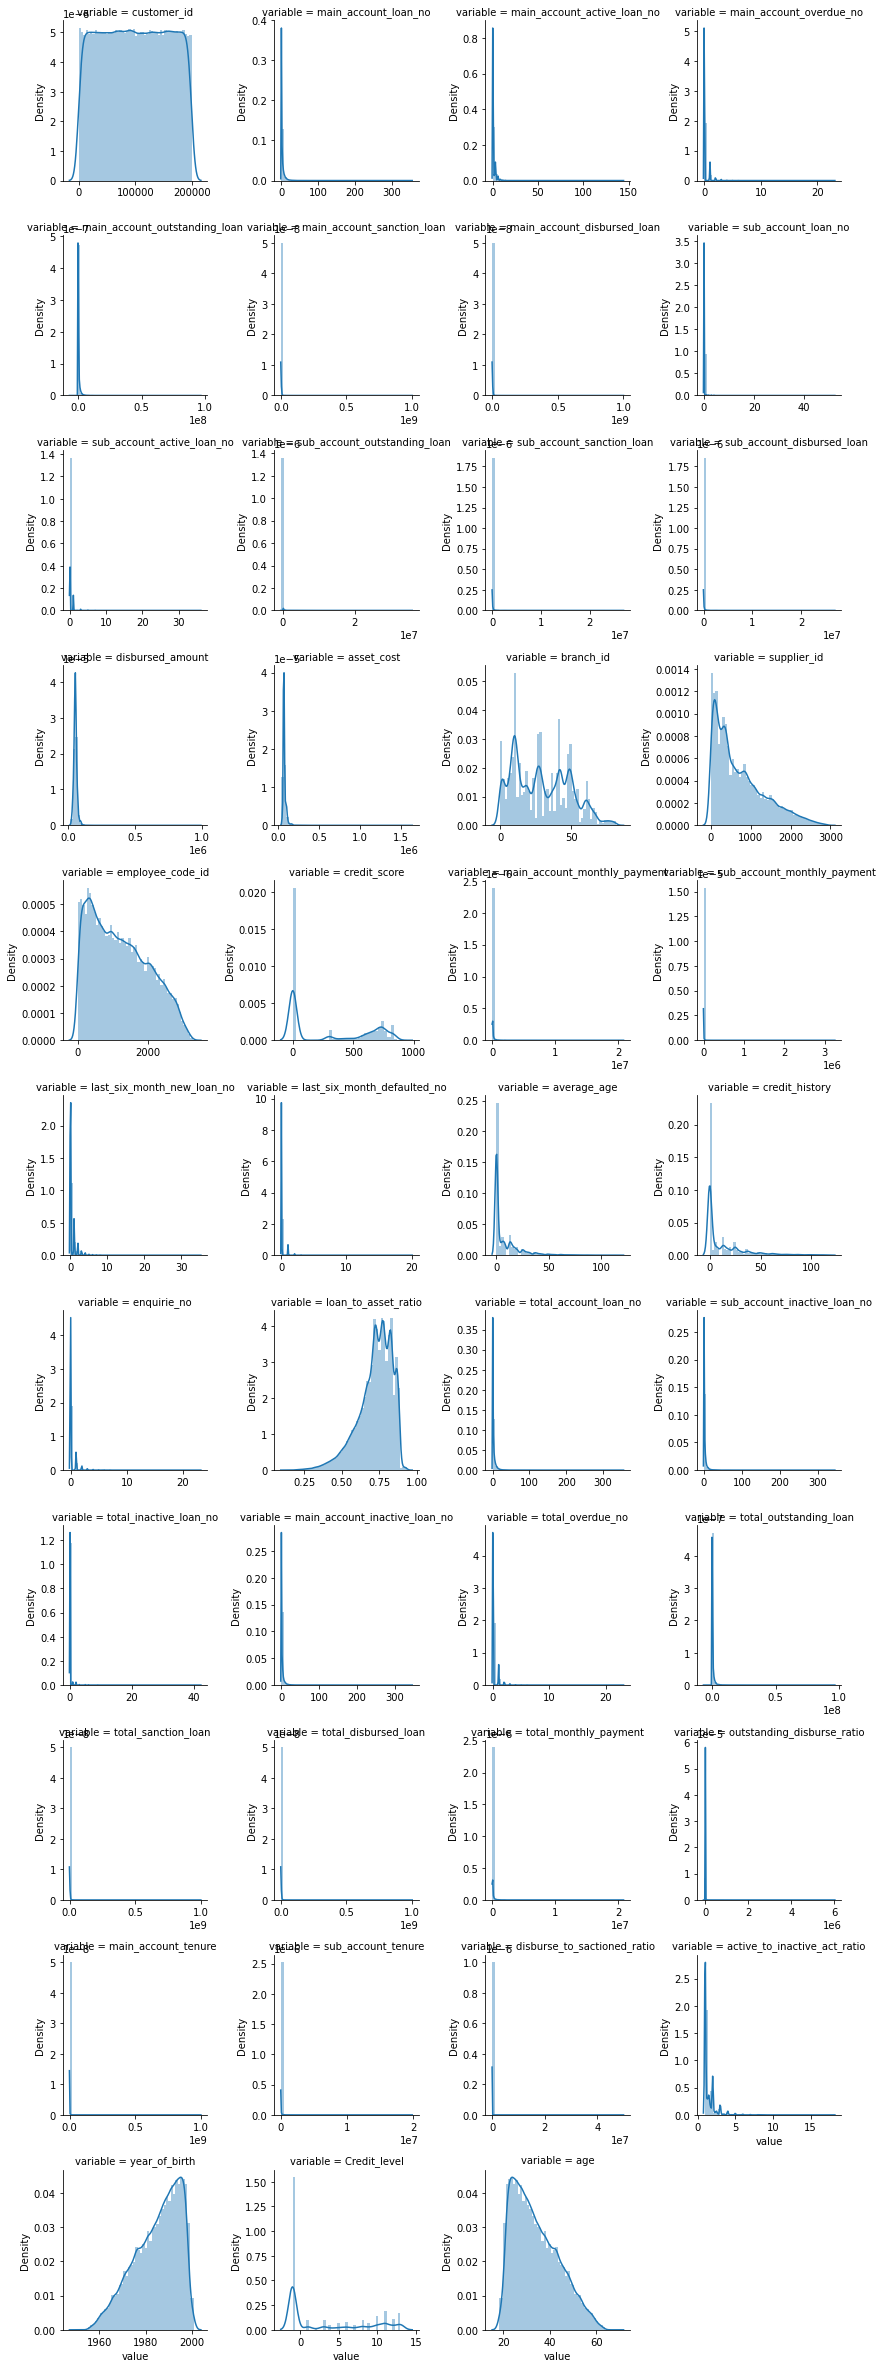

In [15]:
f = pd.melt(df,value_vars=numerical_serial_feas)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot,"value")

### 2.2 离散型变量直方图

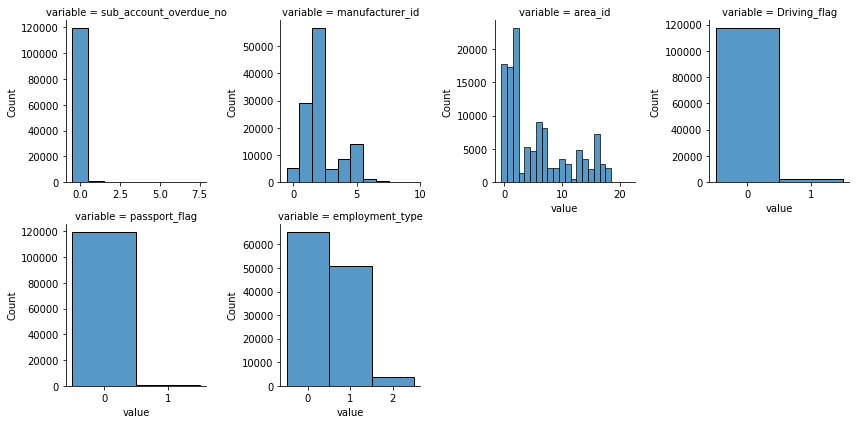

In [17]:
f = pd.melt(df,value_vars=numerical_noserial_feas)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot,"value",discrete=True,)

### 2.3 带类别信息-连续型变量KDE图

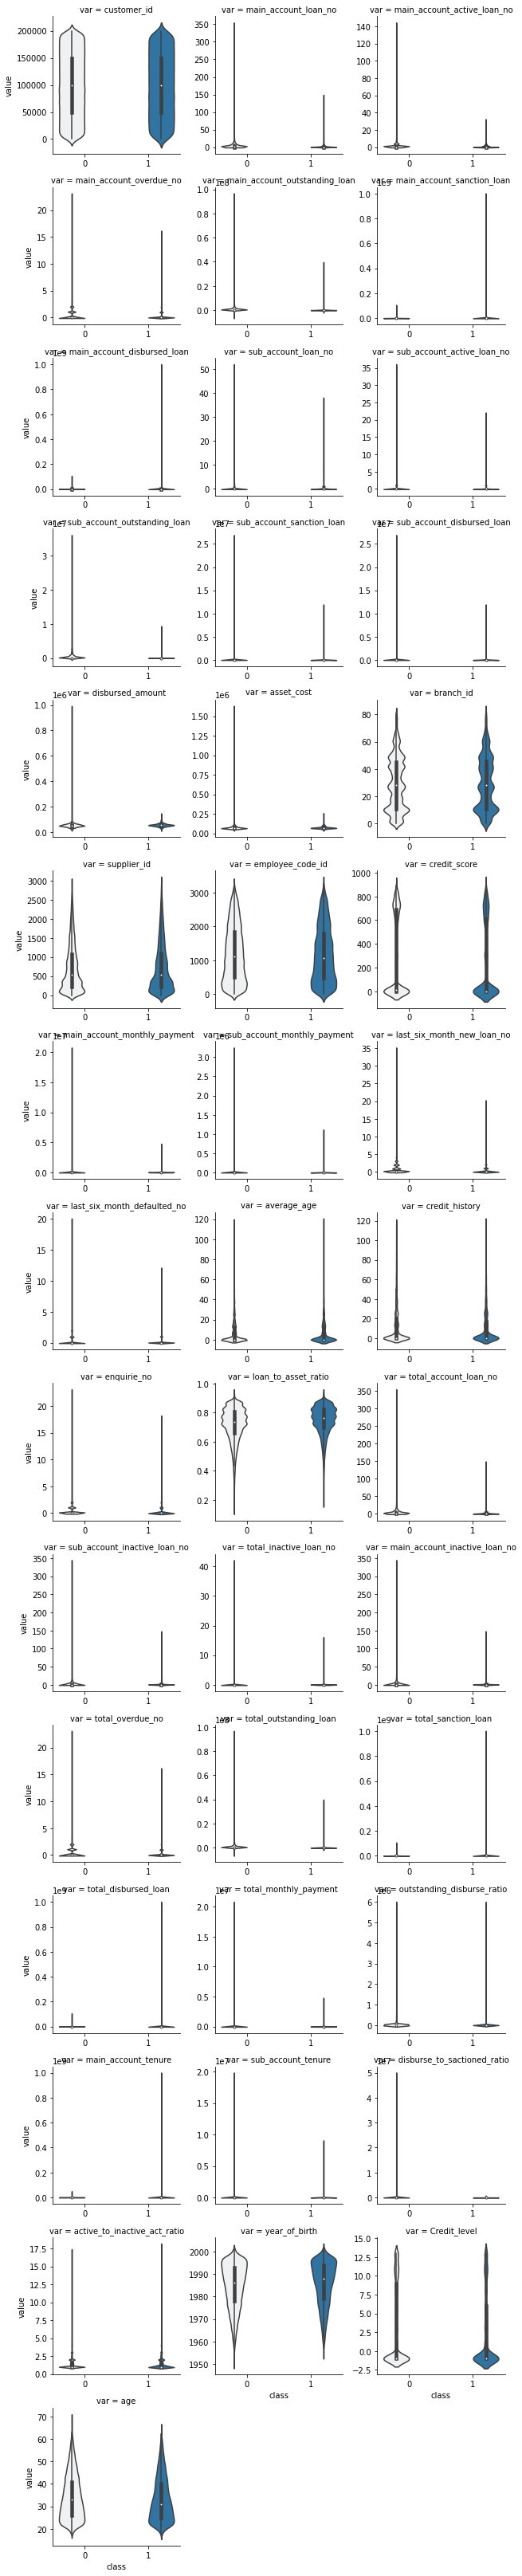

In [18]:
arr = [list(df["loan_default"]) * len(numerical_serial_feas)]
arr = [y for x in arr for y in x]
f = pd.melt(df,value_vars=numerical_serial_feas,var_name="var")
f["class"] = arr
g = sns.FacetGrid(data=f, col="var",col_wrap=3, sharex=False, sharey=False)
g = g.map_dataframe(sns.violinplot,x="class",y="value",hue="class")

### 2.4 带类别信息-离散型变量直方图

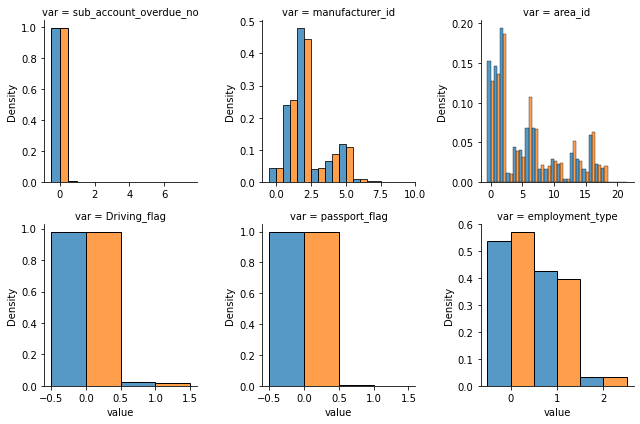

In [20]:
arr = [list(df["loan_default"]) * len(numerical_noserial_feas)]
arr = [y for x in arr for y in x]
f = pd.melt(df,value_vars=numerical_noserial_feas,var_name="var")
f["class"] = arr
g = sns.FacetGrid(data=f, col="var",col_wrap=3, sharex=False, sharey=False)
g = g.map_dataframe(sns.histplot,x="value",hue="class",multiple="dodge",discrete=True,stat="density", common_norm=False)

### 2.5 特征相关度热力图

<AxesSubplot:>

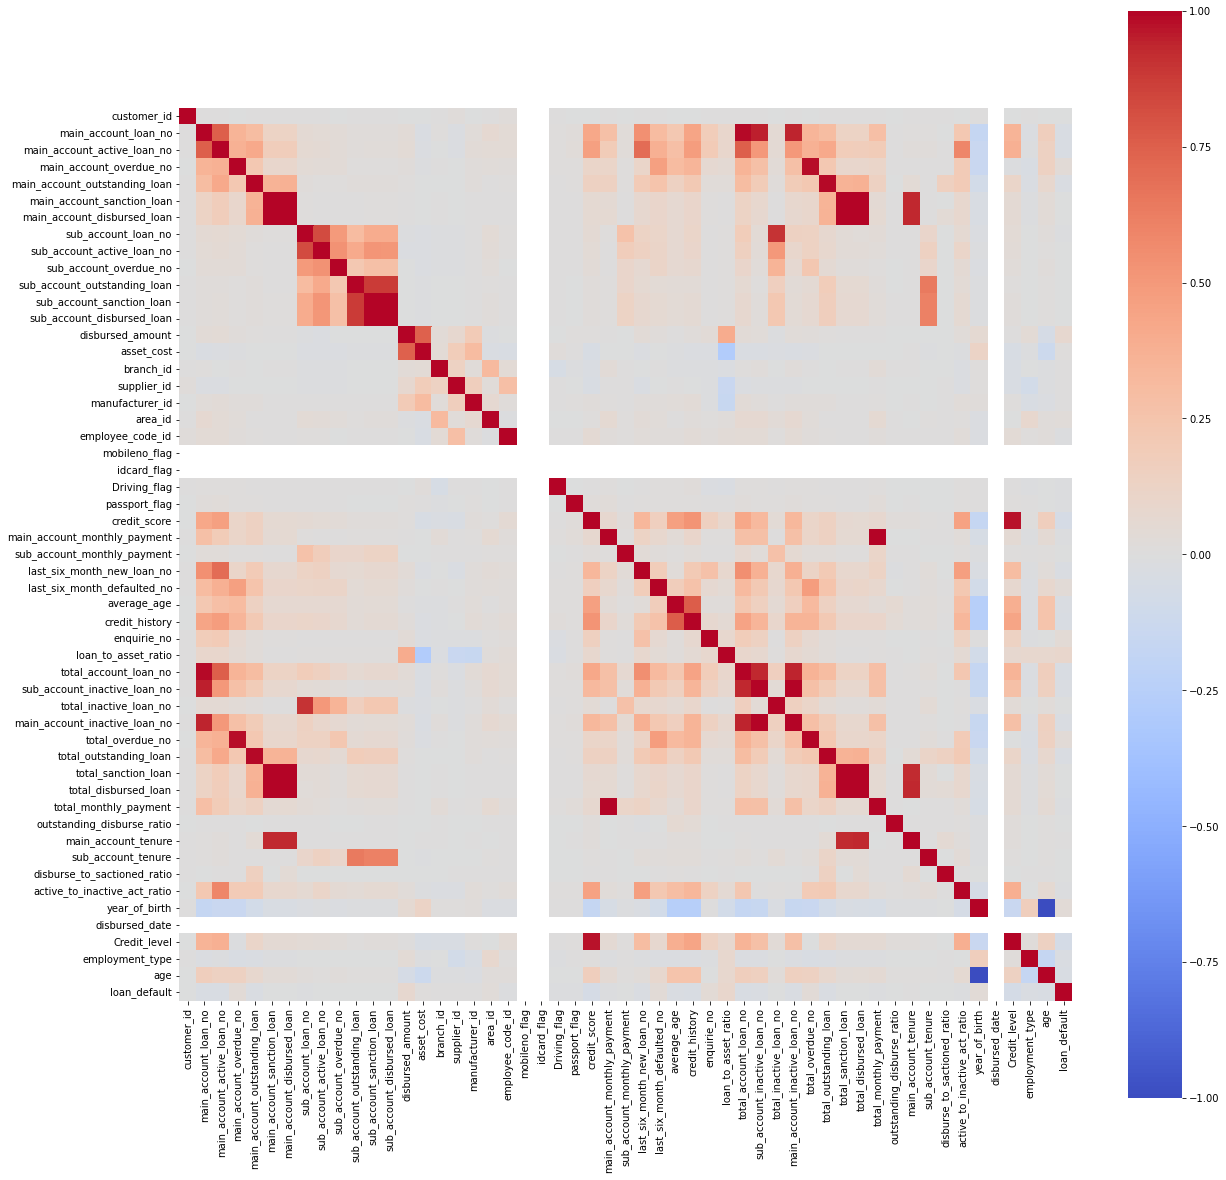

In [21]:
#查看特征之间的相关性
fig = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), square=True, cmap='coolwarm', annot_kws={'size': 14})

In [22]:
#统计一些相关度非常高的特征对，后续可以仅保持一个特征
index = np.where(np.logical_or(df.corr() > 0.99,df.corr() <-0.99))
feature_pair = [(df.columns[i],df.columns[j]) for (i,j) in zip(*index) if i<j]
feature_pair

[('main_account_loan_no', 'total_account_loan_no'),
 ('main_account_sanction_loan', 'main_account_disbursed_loan'),
 ('main_account_sanction_loan', 'total_sanction_loan'),
 ('main_account_sanction_loan', 'total_disbursed_loan'),
 ('main_account_disbursed_loan', 'total_sanction_loan'),
 ('main_account_disbursed_loan', 'total_disbursed_loan'),
 ('sub_account_sanction_loan', 'sub_account_disbursed_loan'),
 ('main_account_monthly_payment', 'total_monthly_payment'),
 ('sub_account_inactive_loan_no', 'main_account_inactive_loan_no'),
 ('total_sanction_loan', 'total_disbursed_loan'),
 ('year_of_birth', 'age')]

In [23]:
#先只删除唯一值的特征
df = df.drop(unique_feas,axis=1)

In [24]:
# todo,特征的归一化

## 3. 模型训练和推理

### 2.1 训练集和测试集拆分

In [26]:
from sklearn.model_selection import train_test_split
X,y = df.iloc[:,1:-1],df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20000,random_state=222,stratify=y)

In [29]:
print(np.bincount(y_train))
print(np.bincount(y_test))

[82340 17660]
[16468  3532]


In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 48)
(20000, 48)
(100000,)
(20000,)


### 2.2.1 逻辑回归方法

In [31]:
# test logistic regression
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
lr = LogisticRegressionCV(class_weight="balanced",scoring="f1_macro")
lr.fit(X_train,y_train)
y_lr_pred = lr.predict(X_test)

In [32]:
from sklearn import cross_validation, metrics
from sklearn.metrics import confusion_matrix,classification_report

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
print(f"macro-f1 score: {metrics.f1_score(y_lr_pred, y_test,average='macro'):.3f}")
print("confusion_matrix:")
print(confusion_matrix(y_lr_pred,y_test))
print("classification_report:")
print(classification_report(y_lr_pred,y_test))

macro-f1 score: 0.447
confusion_matrix:
[[7003 1041]
 [9465 2491]]
classification_report:
             precision    recall  f1-score   support

          0       0.43      0.87      0.57      8044
          1       0.71      0.21      0.32     11956

avg / total       0.59      0.47      0.42     20000



### 2.2.1 随机森林方法

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

In [221]:
rf0 = RandomForestClassifier(oob_score=True, random_state=222,class_weight="balanced")
rf0.fit(X_train,y_train)
print(f"oob_score: {rf0.oob_score_:.3f}")
y_rf_pred = rf0.predict(X_test)

oob_score: 0.791


In [220]:
print(f"macro-f1 score: {metrics.f1_score(y_rf_pred, y_test,average='macro'):.3f}")
print("confusion_matrix:")
print(confusion_matrix(y_rf_pred,y_test))
print("classification_report:")
print(classification_report(y_rf_pred,y_test))

macro-f1 score: 0.479
confusion_matrix:
[[16230  3416]
 [  238   116]]
classification_report:
             precision    recall  f1-score   support

          0       0.99      0.83      0.90     19646
          1       0.03      0.33      0.06       354

avg / total       0.97      0.82      0.88     20000



### 2.2.3 支持向量机的办法

In [ ]:
# test SVC
from sklearn.svm import SVC
clf = SVC(class_weight="balanced")
clf.fit(X_train,y_train)

In [25]:
y_svc_pred = clf.predict(X_test)
print(f"macro-f1 score: {metrics.f1_score(y_svc_pred, y_test,average='macro'):.3f}")
print("confusion_matrix:")
print(confusion_matrix(y_svc_pred,y_test))
print("classification_report:")
print(classification_report(y_svc_pred,y_test))

macro-f1 score: 0.457
confusion_matrix:
[[16429  3511]
 [   39    21]]
classification_report:
             precision    recall  f1-score   support

          0       1.00      0.82      0.90     19940
          1       0.01      0.35      0.01        60

avg / total       0.99      0.82      0.90     20000



### 2.2.4 XGBoost的方法

In [28]:
import xgboost as xgb

In [30]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

[13:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=4,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', use_label_encoder=True,
       validate_parameters=1, verbosity=None)

In [33]:
y_xgb_pred = model.predict(X_test)
y_xgb_pred

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
print(f"macro-f1 score: {metrics.f1_score(y_xgb_pred, y_test,average='macro'):.3f}")
print("confusion_matrix:")
print(confusion_matrix(y_xgb_pred,y_test))
print("classification_report:")
print(classification_report(y_xgb_pred,y_test))

macro-f1 score: 0.466
confusion_matrix:
[[16391  3479]
 [   77    53]]
classification_report:
             precision    recall  f1-score   support

          0       1.00      0.82      0.90     19870
          1       0.02      0.41      0.03       130

avg / total       0.99      0.82      0.90     20000



In [37]:
size0,size1 = np.bincount(y_train)
print(size0,size1)

82340 17660


In [38]:
# 带类别权重的xgboost
model = xgb.XGBClassifier(scale_pos_weight=size0/size1)
model.fit(X_train, y_train)

[14:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=4,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=4.662514156285391, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

In [39]:
y_xgb2_pred = model.predict(X_test)
print(f"macro-f1 score: {metrics.f1_score(y_xgb2_pred, y_test,average='macro'):.3f}")
print("confusion_matrix:")
print(confusion_matrix(y_xgb2_pred,y_test))
print("classification_report:")
print(classification_report(y_xgb2_pred,y_test))

macro-f1 score: 0.541
confusion_matrix:
[[10419  1511]
 [ 6049  2021]]
classification_report:
             precision    recall  f1-score   support

          0       0.63      0.87      0.73     11930
          1       0.57      0.25      0.35      8070

avg / total       0.61      0.62      0.58     20000



D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 2.2.5 网格搜索+交叉验证

In [39]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=222)

In [40]:
scale_pos_weight = [1+(4.6-1)/3*i for i in range(5)] #[1.0, 2.2, 3.4, 4.6, 5.8]
max_depth = [4,5,6,7,8]
n_estimators = [50,100,150]

In [41]:
params = dict(scale_pos_weight=scale_pos_weight,max_depth=max_depth,n_estimators=n_estimators)
params

{'scale_pos_weight': [1.0, 2.2, 3.4, 4.6, 5.8],
 'max_depth': [4, 5, 6, 7, 8],
 'n_estimators': [50, 100, 150]}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
base_xgb = xgb.XGBClassifier()
grid_clf = GridSearchCV(estimator = base_xgb, param_grid = params, cv = skf,scoring="f1_macro",n_jobs=-1, verbose=4)
grid_clf.fit(X,y)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 375 out of

[11:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=222, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       enable_categorical=False, gamma=None, gpu_id=None,
       importance_type=None, interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max...ple=None, tree_method=None, use_label_encoder=True,
       validate_parameters=None, verbosity=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scale_pos_weight': [1.0, 2.2, 3.4, 4.6, 5.8], 'max_depth': [4, 5, 6, 7, 8], 'n_estimators': [50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=4)

In [45]:
grid_clf.best_score_

0.5769158375556602

In [46]:
grid_clf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=222, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       enable_categorical=False, gamma=None, gpu_id=None,
       importance_type=None, interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max...ple=None, tree_method=None, use_label_encoder=True,
       validate_parameters=None, verbosity=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scale_pos_weight': [1.0, 2.2, 3.4, 4.6, 5.8], 'max_depth': [4, 5, 6, 7, 8], 'n_estimators': [50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=4)

In [47]:
grid_clf.best_params_

{'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 3.4}

### 2.3 测试集推理

In [54]:
df_test = pd.read_csv("test_2.csv")
df_test = df_test.drop(unique_feas,axis=1)

In [55]:
X_test = df_test.iloc[:,1:-1]
y_test = df_test.iloc[:,-1]
print(X_test.shape)
print(y_test.shape)

(30000, 48)
(30000,)


In [56]:
y_pred = grid_clf.predict(X_test)
print(f"macro-f1 score: {metrics.f1_score(y_pred, y_test,average='macro'):.3f}")
print("confusion_matrix:")
print(confusion_matrix(y_pred,y_test))
print("classification_report:")
print(classification_report(y_pred,y_test))

macro-f1 score: 0.571
confusion_matrix:
[[19291  3271]
 [ 5356  2082]]
classification_report:
             precision    recall  f1-score   support

          0       0.78      0.86      0.82     22562
          1       0.39      0.28      0.33      7438

avg / total       0.69      0.71      0.70     30000



D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
